<a href="https://colab.research.google.com/github/jitteryglitter/Covid-SSL/blob/master/Scikit_multiple_regression_ad_spend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

1. Dataset: ad campaign spend across channels, with sales
2. Packages: Scikit Learn
3. Models: Linear Regression, and multiple LR
4. Metrics: R^2, MSE, RMSE
5. Regularization: Lasso, Ridge

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
filep = "/content/drive/MyDrive/ML Projects/Data/advertising_and_sales_clean.csv"

df = pd.read_csv(filep)
df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


# EDA

In [6]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [7]:
# check summary stats
df.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


In [31]:
# check categorical columns
df.select_dtypes("object").describe()

,influencer
count,4546
unique,4
top,Mega
freq,1152


In [32]:
# check unique values and counts of categorical variable
df["influencer"].value_counts()

influencer
Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: count, dtype: int64

<Axes: xlabel='influencer'>

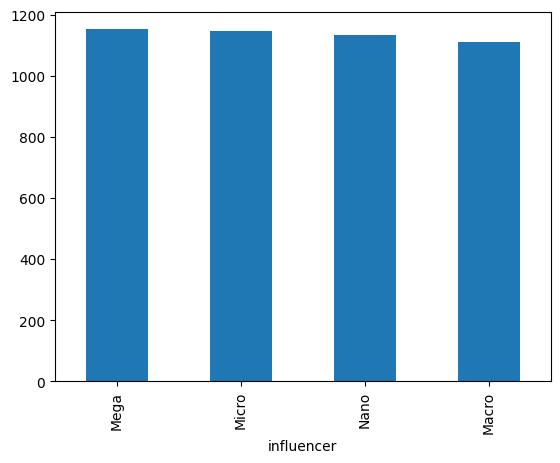

In [33]:
# graph the categorical variable
df["influencer"].value_counts().plot(kind="bar")

In [8]:
# check for nulls
df.isnull().sum()

tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64

<Axes: >

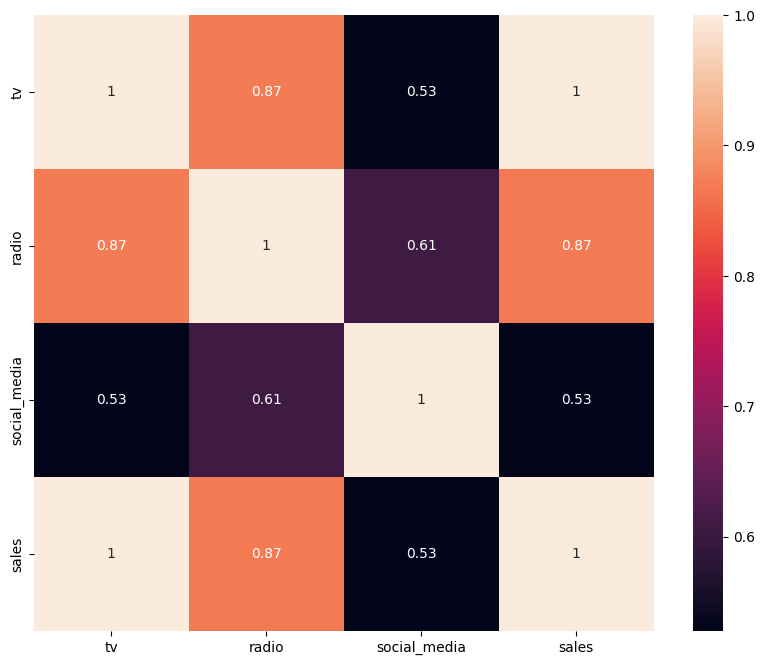

In [14]:
# any correlations? check heatmap

# first kick out non-numerical col
df1 = df.drop(["influencer"], axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True)

<Axes: >

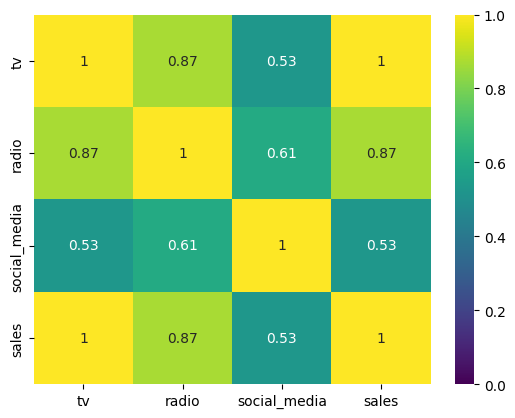

In [15]:
sns.heatmap(df1.corr(), annot=True, vmin=0, vmax=1, cmap='viridis')

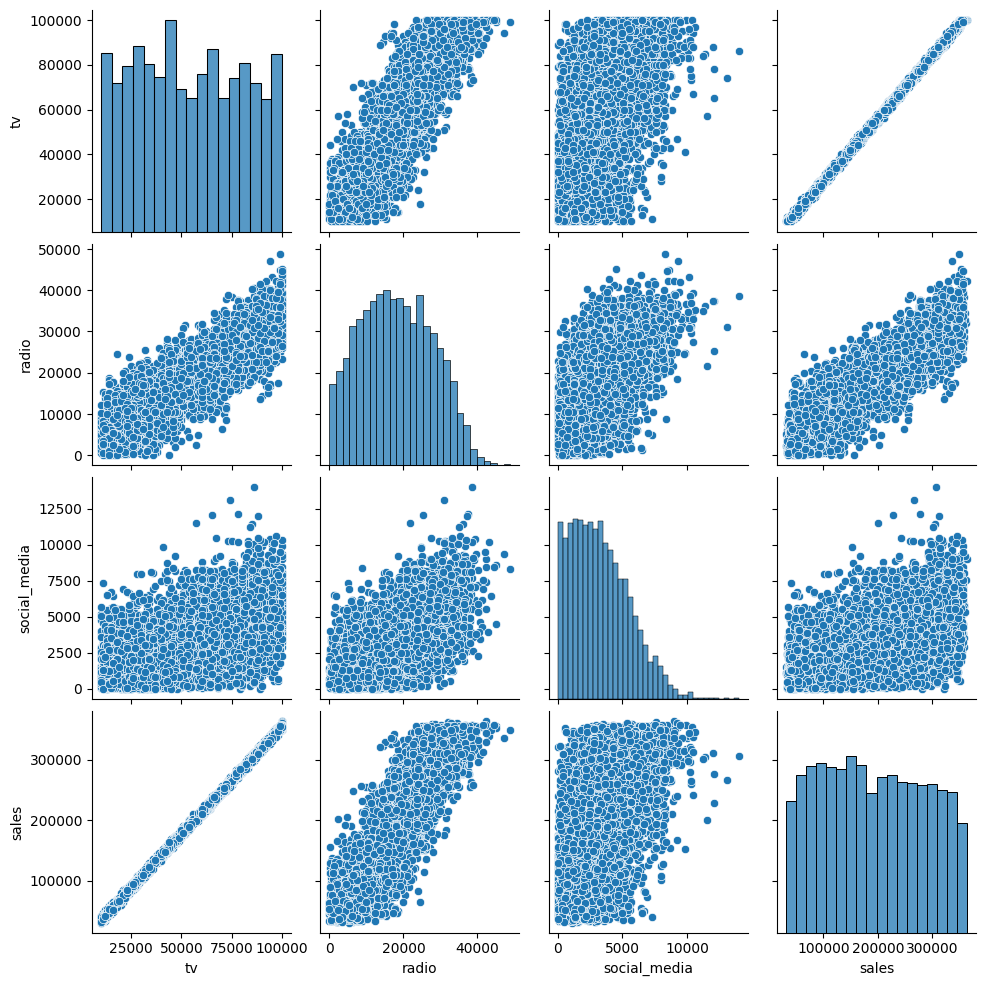

In [16]:
# scatterplots
sns.pairplot(df)

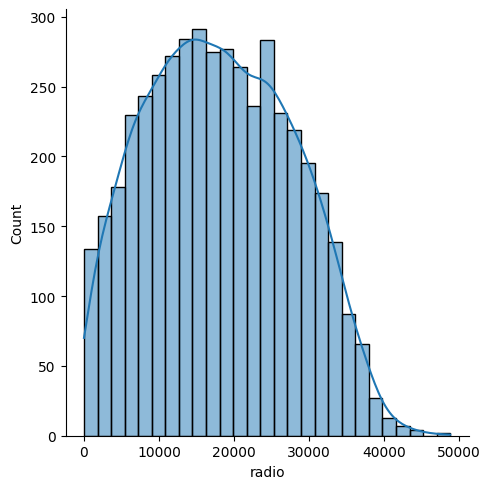

In [19]:
# individual ditribution plot
sns.displot(df["radio"], kde=True)

<ipython-input-30-7551b94e2748>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, index+1)


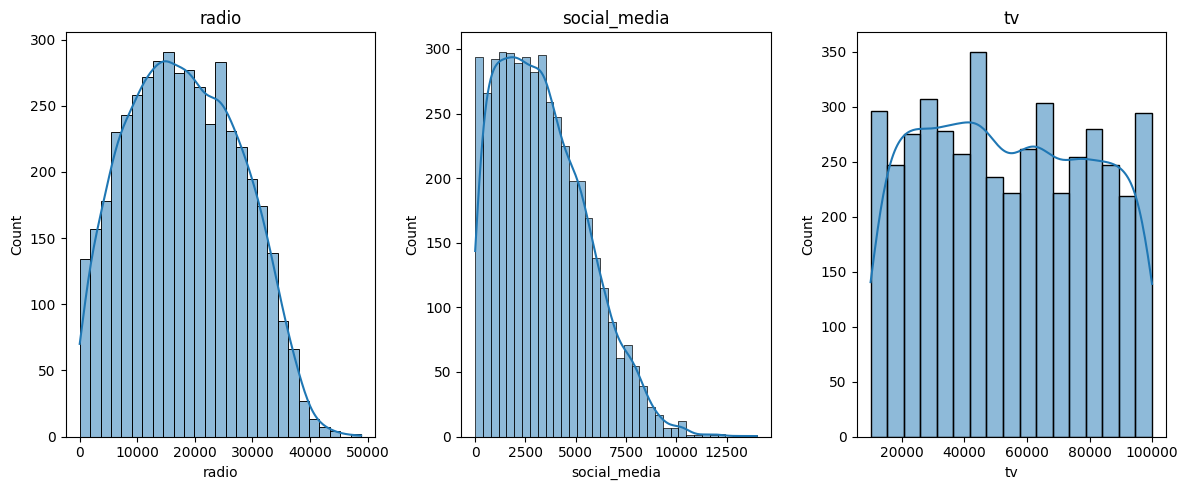

In [30]:
# diplay all three histograms in a single row
lis = ["radio", "social_media", "tv"]
plt.subplots(figsize=(12, 5))
index = 0
for i in lis:
  plt.subplot(1, 3, index+1)
  sns.histplot(df[i], kde=True)
  plt.title(i)
  index += 1
plt.tight_layout()
plt.show()

# LR for single channel

In [ ]:
# Create X, the FEATURES array from the "radio" column
X = df['radio'].values

# Create y, the TARGET array from the "sales" column
y = df['sales'].values

# Reshape X into a 2-D numpy array
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)




> ` 4,564 ` values in both arrays.



In [ ]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]




> Sales values for the first five predictions range from USD 95K to 290K



# Visualize fit

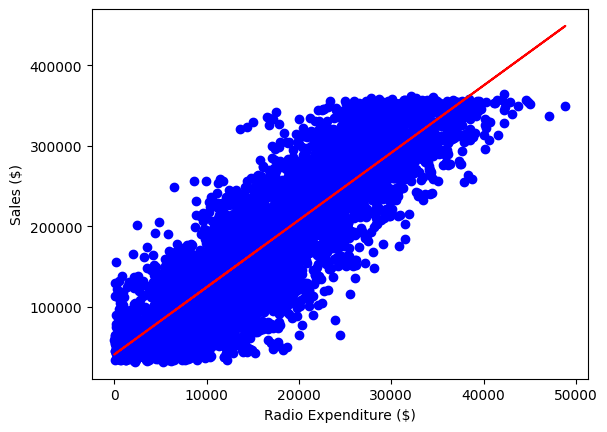

In [ ]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Add line plot on top
plt.plot(X, predictions, color="red")

# Add axes labels
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

> The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales!

# Multiple LR

In [ ]:
# Create X and y arrays
X = df.drop(["influencer", "sales"], axis=1).values
y = df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


> The first two predictions appear to be within around 5% of the actual values from the test set!

# Regression performance

### How well do the features explain the variance in the target values?
1. The default metric for LR = ` R-squared `.
2. It quantifies the amount of variance in the target variable that is explained by the features.
3. Values can range from zero to one, with one meaning the features completely explain the target's variance.

### Assess the model's ability to make predictions on unseen data

1. Another way = ` MSE ` or mean of the residual sum of squares.
2. MSE is measured in units of our target variable, squared.
3. Yet another way = ` RMSE ` or square root of MSE, hence the ` squared=False `.


In [ ]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


> Wow, the features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!

# Cross-validation

Cross-validation helps overcome the limitations of a simple train-test split by using multiple splits of the data into training and testing sets, allowing for a more robust assessment of a model's performance.

> Cross-validation Explained: You discovered that cross-validation involves dividing the dataset into k parts (or folds), then systematically using each fold for testing while the remaining parts are used for training. This process is repeated k times, once for each fold, to ensure every data point has been used for both training and testing.

> Implementing k-fold Cross-validation: You learned to use KFold and cross_val_score from sklearn.model_selection for performing 6-fold cross-validation. This involves shuffling the dataset, setting a random seed for reproducibility, and then calculating cross-validation scores to assess model performance.

> Analyzing Cross-validation Results: You calculated the mean and standard deviation of the cross-validation scores to get a sense of the model's average performance and its variability. Additionally, you learned to calculate the 95% confidence interval of the scores, providing insight into the range within which the true model performance metric lies with 95% certainty.

If we're computing R-squared on our test set, the R-squared returned is dependent on the way that we split up the data! The data points in the test set may have some peculiarities that mean the R-squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially a random split, we use a technique called cross-validation.

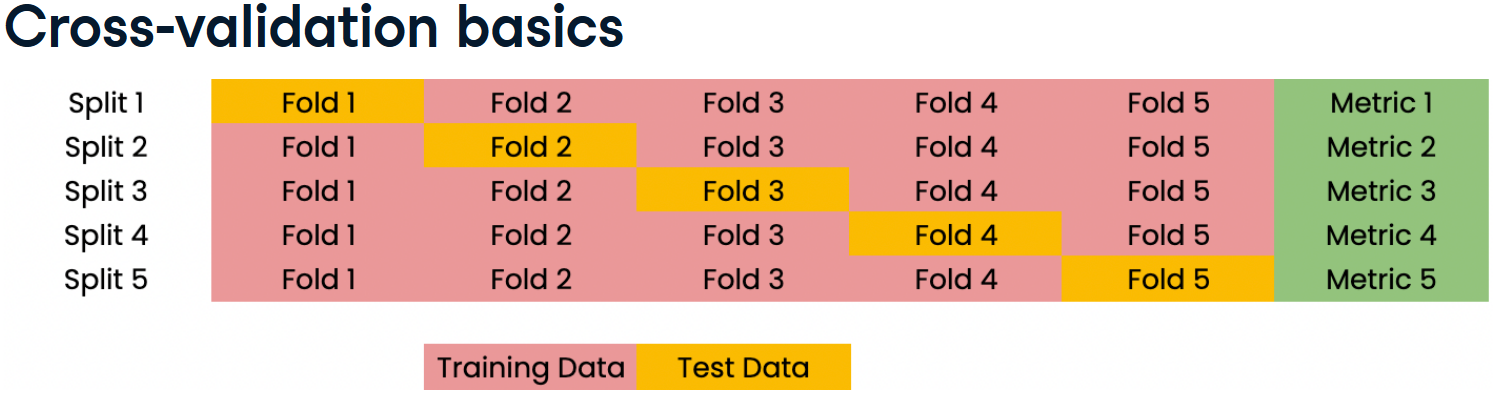

In [ ]:
# Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.


In [ ]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# uncomment the line below if you've lost your LR model
# reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


> Notice how R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!

# Analyze CV metrics

In [ ]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


> An average score of 0.75 with a low standard deviation is pretty good for a model out of the box

# Regularization (to avoid overfitting)

Why regularize?
1. LR minimizes a loss function
2. It chooses a coefficient, a, for each feature variable, plus b
3. Large coefficients can lead to overfitting
4. Regularization: Penalize large coefficients

# Ridge

1. This uses the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, ` alpha `.
2. So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values.
3. When using ` ridge `, we need to choose the ` alpha ` value in order to fit and predict. Essentially, we can select the alpha for which our model performs best.
4. Picking alpha for ridge is similar to picking ` k ` in KNN.
5. Alpha in ridge is known as a hyperparameter, which is a variable used for selecting a model's parameters.
6. Alpha controls model complexity. When ` alpha=0 `, we are performing OLS, where large coefficients are not penalized and overfitting may occur. A high alpha means that large coefficients are significantly penalized, which can lead to underfitting.

> Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In [ ]:
# a range of different alpha values over which the model will be fitted
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

ridge_scores = []

for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)

  # Fit the data
  ridge.fit(X_train, y_train)

  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)

print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764388, 0.9990152104809561]


> The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

# Lasso regression for feature importance

# lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

In [ ]:
# Create X, the FEATURES array
X = df.drop(['influencer', 'sales'], axis=1).values

# Create y, the TARGET array from the "sales" column
y = df['sales'].values

# Reshape X into a 2-D numpy array
# X = X.reshape(-1, 1)
# use your brains!! X doesn't need to be reshaped because
# it's already multi-column

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 3) (4546,)


In [ ]:
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


[ 3.56256962 -0.00397035  0.00496385]


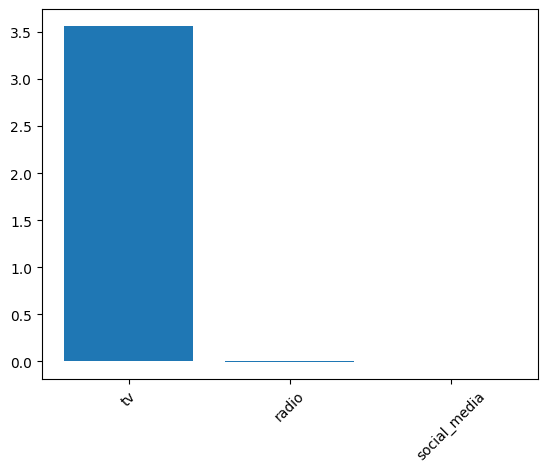

In [ ]:
# add all column names to "sales_columns"
all_features = df.drop(['influencer', 'sales'], axis=1).columns

# Plot the coefficients
plt.bar(all_features, lasso_coef)
plt.xticks(rotation=45)
plt.show()

> the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!

# Precision Accuray

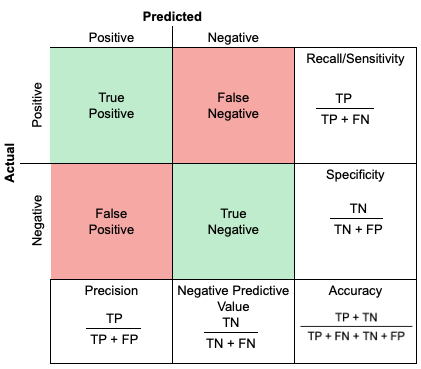